# Mini Project 3: Bank Fraud Detection

#### 1. Given the data below, please classify the two cluster data and find the boundary line to devide the two groups. Use visualization to show your answer. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import datasets

X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=1234)

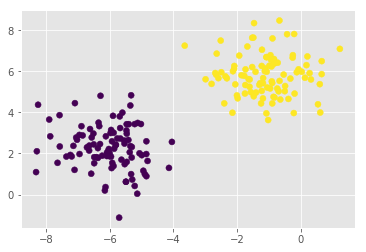

In [20]:
plt.style.use('ggplot')
plt.scatter(X[:,0],X[:,1],c=Y)

#### 1. SVM Method

In [21]:
from sklearn import svm
svc = svm.SVC(kernel='linear',C=1.0).fit(X,Y)
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=1.0).fit(X,Y)
poly_svc = svm.SVC(kernel='poly',degree=3,C=1.0).fit(X,Y)
lin_svc = svm.LinearSVC(C=1.0).fit(X,Y)

In [24]:
# create a mesh to plot in
h=0.02
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))

In [25]:
## concatenate numpy array:
np.concatenate((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1)),axis=1)

array([[-9.31746603, -2.12134124],
       [-9.29746603, -2.12134124],
       [-9.27746603, -2.12134124],
       ...,
       [ 2.18253397,  9.45865876],
       [ 2.20253397,  9.45865876],
       [ 2.22253397,  9.45865876]])

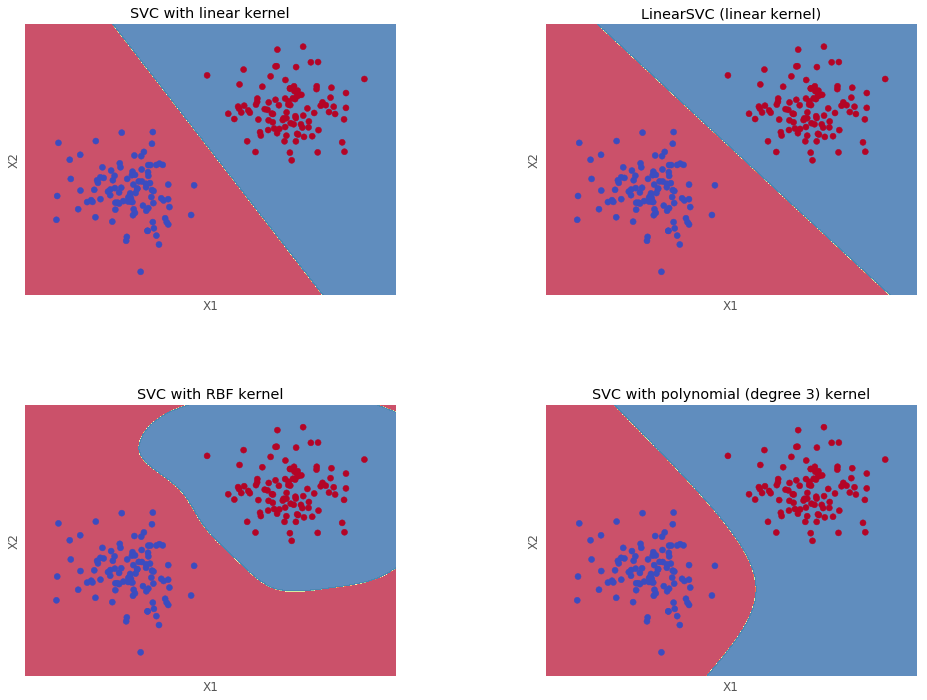

In [28]:
# titles for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

fig = plt.figure(figsize=(16,12))
for i, clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    z = clf.predict(np.concatenate((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1)),axis=1))
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral, alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### 2. In problem 1, we use classification method to classify two two-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Bank Fraud Detection Case where you will classify two multiple-feature groups.

**Data Description:**

**label.test.csv** - the test set, contains customer’s basic attributes and payment histories. You must predict whether these customers are credible or not.

**sample submission.csv** - a file showing the correct submission format. You must replace the NA’s with the predicted class labels. You should show your results by submitting the .csv file according to the format of this sample submission.csv.

**id**: A unique Id field which represents a customer

**X1**: Credit lineX2: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is creditable (1) or not (0).

This is a real problem to classify multi-feature data into two groups.


**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
( You can google “Component Analysis with KMeans visuals – Kaggle” and learn how to do this step from Kaggle website)
4.	You don’t need to do PCA right now. 
5.	Choose the proper method to train the model:
binary classification Models: Logistic regression, Support vector machine, Naive Bayes, k-nearest neighbors, neural network, Decision tree…

6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.


1. take a closer look at data

In [31]:
# load data set
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
id     25000 non-null int64
X1     25000 non-null int64
X2     25000 non-null int64
X3     25000 non-null int64
X4     25000 non-null int64
X5     25000 non-null int64
X6     25000 non-null int64
X7     25000 non-null int64
X8     25000 non-null int64
X9     25000 non-null int64
X10    25000 non-null int64
X11    25000 non-null int64
X12    25000 non-null int64
X13    25000 non-null int64
X14    25000 non-null int64
X15    25000 non-null int64
X16    25000 non-null int64
X17    25000 non-null int64
X18    25000 non-null int64
X19    25000 non-null int64
X20    25000 non-null int64
X21    25000 non-null int64
X22    25000 non-null int64
X23    25000 non-null int64
Y      25000 non-null int64
dtypes: int64(25)
memory usage: 4.8 MB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
id     5000 non-null int64
X1     5000 non-null int64
X2     5000 non-null int64
X3     5000 non-null int64
X4     5000 non-null int64
X5     5000 non-null int64
X6     5000 non-null int64
X7     5000 non-null int64
X8     5000 non-null int64
X9     5000 non-null int64
X10    5000 non-null int64
X11    5000 non-null int64
X12    5000 non-null int64
X13    5000 non-null int64
X14    5000 non-null int64
X15    5000 non-null int64
X16    5000 non-null int64
X17    5000 non-null int64
X18    5000 non-null int64
X19    5000 non-null int64
X20    5000 non-null int64
X21    5000 non-null int64
X22    5000 non-null int64
X23    5000 non-null int64
dtypes: int64(24)
memory usage: 937.6 KB


In [34]:
train.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [35]:
test.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,25001,180000,1,1,2,27,-1,0,0,0,...,6482,3246,2016,2334,12000,5004,1000,1000,2300,3000
1,25002,230000,2,3,1,52,-2,-2,-2,-2,...,2233,1410,0,0,3939,2244,1421,0,0,236
2,25003,150000,2,1,2,28,-1,-1,2,-1,...,1159,1159,11476,10249,2468,0,1159,11476,0,2034
3,25004,160000,1,1,1,40,0,0,2,2,...,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,25005,20000,2,2,2,26,0,0,0,0,...,8515,6584,3403,3748,2600,1500,1500,1000,402,0


After checking the data types and cols for both sets, we can take a look at null values.

In [38]:
train.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [39]:
test.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

###### 2. discern the categorical and continuous variables

In [42]:
# train.describe().unstack()

In [45]:
cat=[]
con=[]
for c in train.columns:
    if len(train[c].value_counts().index)<23:
        cat.append(c)
    else:
        con.append(c)
cat.remove('Y')
target = ['Y']

In [46]:
print("the catagorical variables are:", cat)

the catagorical variables are: ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


In [47]:
print("the continuous variables are:", con)

the continuous variables are: ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


###### 3. Check if features have linear relationship between each other.

In [48]:
# plot correlation plot

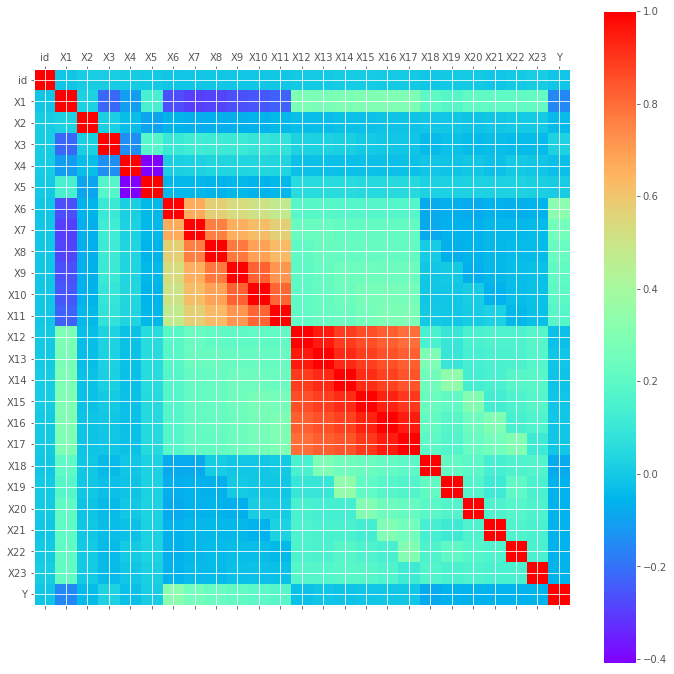

In [50]:
def plot_corr(df,size):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(train,12)

In [51]:
# x12 to x17 are highly correlated with each other, which is not a surprise, as they are all amount of bill statement.

In [53]:
# compare the number of labels for train VS. test set

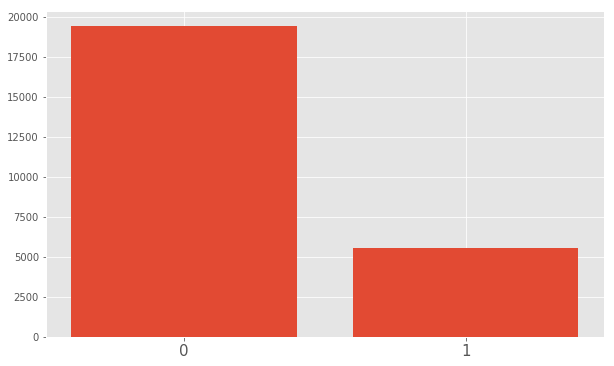

In [57]:
fig = plt.figure(figsize=(10,6))
plt.bar(train['Y'].value_counts().index, train['Y'].value_counts().values)
plt.xticks(train['Y'].value_counts().index,fontsize=15)
plt.show()

###### 4. build baseline model

In [ ]:
# build a baseline model using random forest

In [58]:
from sklearn.model_selection import train_test_split
y = train['Y']
x = train.drop(['Y','id'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight={0:1,1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.95      0.88      3923
          1       0.60      0.28      0.38      1077

avg / total       0.78      0.80      0.78      5000



###### 5. parameter tuning: grid searching

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train,y_train,est,param_grid,n_jobs,cv):
    model = GridSearchCV(estimator=est,param_grid=param_grid,
                        scoring='f1_weighted',verbose=10,
                         n_jobs=n_jobs,iid=True,cv=cv)
    model.fit(x_train, y_train)   
    return model

In [63]:
## Grid search is actually using cross validation method to tune parameters. 

In [65]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(x.values
            , y.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7856765721663118, total=   7.0s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7985017336099589, total=   7.0s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.788139442153694, total=   7.2s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=100, score=0.7878082252097253, total=   7.2s
[CV] class_weigh

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.4s


[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7840103119697109, total=  20.3s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7871460984174385, total=  20.2s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7982149537458346, total=  20.3s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.7890721380518921, total=  20.3s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=300, score=0.790187869323114, total=  19.4s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   50.0s


[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7865792791928492, total=  31.6s
[CV] class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500 .....
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.8004410837462889, total=  31.8s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7911315241305353, total=17.1min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.79086749526253, total=   8.8s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.8027910069143421, total=  21.1s
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.7927293199771837, total=  20

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 18.1min


[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.789251563147533, total= 8.3min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=100, score=0.790933998622096, total= 8.3min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=gini, n_estimators=500, score=0.7902819385125078, total=25.4min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.7891185465420458, total= 8.7min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.8018637405967681, total=120.6min
[CV] class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500 ..
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=300, score=0.7932169285710889, tot

[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 1083.4min remaining: 120.4min


[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7945763169712953, total=936.2min
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7924487584947175, total=782.4min
[CV]  class_weight={0: 1, 1: 3}, criterion=entropy, n_estimators=500, score=0.7941288312673078, total=  43.1s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 1084.1min finished


In [66]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.grid_scores_)

Best score: 0.794
Best parameters set: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}
Scores: [mean: 0.78977, std: 0.00449, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 100}, mean: 0.78973, std: 0.00473, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 300}, mean: 0.79165, std: 0.00466, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 500}, mean: 0.79332, std: 0.00486, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 100}, mean: 0.79361, std: 0.00448, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 300}, mean: 0.79408, std: 0.00387, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}]


/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [67]:
# compare across models

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',class_weight = {0:1, 1:3})
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression (class_weight = {0:1, 1:3})
# results from your gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, x, y, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.00) [Random_Forest]
Accuracy: 0.71 (+/- 0.00) [KNN]
Accuracy: 0.74 (+/- 0.01) [Logistic]


/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.78 (+/- 0.00) [Ensemble]


/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [77]:
# eclf

Generate Final Label Results

In [78]:
eclf.fit(x,y)

VotingClassifier(estimators=[('Random_Forest', RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_s...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [79]:
Y = pd.DataFrame(eclf.predict(test.drop(['id'],axis=1)),columns=['y'])

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [80]:
Y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [84]:
predict_data = pd.concat([y,test['id']],axis=1)

In [85]:
predict_data.to_csv('Submission.csv',index=False)